# Влияние условий жизни учащихся на успеваемость по математике

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

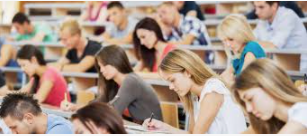

## Описание данных

В датасете ([ссылка](https://lms.skillfactory.ru/assets/courseware/v1/425d6864db937e4ebabc972e581769ab/asset-v1:Skillfactory+DST-PRO+15APR2020+type@asset+block/stud_math.csv)) представлены следующие данные:
1. *school* — аббревиатура школы, в которой учится ученик
2. *sex* — пол ученика ('F' - женский, 'M' - мужской)
3. *age* — возраст ученика (от 15 до 22)
4. *address* — тип адреса ученика ('U' - городской, 'R' - за городом)
5. *famsize* — размер семьи('LE3' <= 3, 'GT3' >3)
6. *Pstatus* — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. *Medu* — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. *Fedu* — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. *Mjob* — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. *Fjob* — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. *reason* — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. *guardian* — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. *traveltime* — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. *studytime* — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. *failures* — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. *schoolsup* — дополнительная образовательная поддержка (yes или no)
17. *famsup* — семейная образовательная поддержка (yes или no)
18. *paid* — дополнительные платные занятия по математике (yes или no)
19. *activities* — дополнительные внеучебные занятия (yes или no)
20. *nursery* — посещал детский сад (yes или no)
21. *studytime, granular*
22. *higher* — хочет получить высшее образование (yes или no)
23. *internet* — наличие интернета дома (yes или no)
24. *romantic* — в романтических отношениях (yes или no)
25. *famrel* — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
26. *freetime* — свободное время после школы (от 1 - очень мало до 5 - очень мого)
27. *goout* — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
28. *health* — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
29. *absences* — количество пропущенных занятий
30. *score* — баллы по госэкзамену по математике

## Первичный осмотр и обработка данных

Подготовка рабочего окружения (импорт библиотек и настройка параметров для комфортной работы) и загрузка данных из файла:

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50)  # increase number of rows displayed
pd.set_option('display.max_columns', 50)  # increase number of cols displayed

stud = pd.read_csv('stud_math.csv')

Рассмотрим данные, содержащиеся в файле и их тип:

In [200]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

Датасет содержит числовые и строковые данные, всего 395 записей, некоторая часть данных отстутствует (null). Рассмотрим, что каждый столбец в отдельности.


## Анализ данных в столбцах

Столбцы хорошо проименованы для дальнейшей работы. 
Уже на данном этапе видно, что большая часть датасета содержит категориальные данные (числовых и строковых типов), имеющих пропуски. Попробуем решить эту проблему сразу для всех явно категориальных данных.

In [201]:
# Let's add here some util functions that may come useful across
# the project

def fillna_categorical_columns(df, cols):
    '''    
    Scans categorical data for NaN and replaces those with "mode".
    Provides a short report on found/fixed NaN along the way.
    Parameters:
    df - pandas DataFrame
    cols - list of column names to scan
    Returns:
    Processed DataFrame
    '''
    # Defines maximum number of empty values we are going to fix
    # (30% of dataset length)
    nacount_max = int(len(df) * 0.2)
    for col in cols:
        nacount = len(df[(df[col].isna())])
        print(f'{col:15} NaN found: {nacount} ({round(nacount*100/len(df))}%)', end='')
        if nacount == 0:
            print('\t - OK')
            continue

        # If percentage of nan values > defined maximum, don't
        # attempt to fix it, report problem instead.
        if (nacount > nacount_max):
            print('\t - ERROR: too many to empty values!')
            continue

        col_mode = df[col].mode()[0]
        df[col].fillna(col_mode, inplace=True)
        print(f'\t - FIXED, filled with {col_mode}')

    return df


def display_outliers_range(dfs):
    '''
    Outputs outliers boundaries (lower and upper values) and returns 
    tuple containing those values
    Parameters:
    dfs - data Series
    Returns:
    Tuple with lower and upper boundaries for outliers    
    '''
    pc25 = dfs.quantile(q=0.25, interpolation='midpoint')
    pc75 = dfs.quantile(q=0.75, interpolation='midpoint')
    IQR = pc75 - pc25
    outmin = pc25 - (1.5*IQR)
    outmax = pc75 + (1.5*IQR)
    print(f'Outliers bounds for \'{dfs.name}\': {outmin} - {outmax}')
    return (outmin, outmax)



In [202]:
stud = fillna_categorical_columns(stud,
        ['school', 'sex', 'age', 'address', 'famsize', 'Pstatus',
         'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
         'traveltime', 'studytime', 'failures', 'schoolsup',
         'famsup', 'paid', 'activities', 'nursery', 'higher',
         'internet', 'romantic', 'famrel', 'freetime', 'goout',
         'health'])

school          NaN found: 0 (0%)	 - OK
sex             NaN found: 0 (0%)	 - OK
age             NaN found: 0 (0%)	 - OK
address         NaN found: 17 (4%)	 - FIXED, filled with U
famsize         NaN found: 27 (7%)	 - FIXED, filled with GT3
Pstatus         NaN found: 45 (11%)	 - FIXED, filled with T
Medu            NaN found: 3 (1%)	 - FIXED, filled with 4.0
Fedu            NaN found: 24 (6%)	 - FIXED, filled with 2.0
Mjob            NaN found: 19 (5%)	 - FIXED, filled with other
Fjob            NaN found: 36 (9%)	 - FIXED, filled with other
reason          NaN found: 17 (4%)	 - FIXED, filled with course
guardian        NaN found: 31 (8%)	 - FIXED, filled with mother
traveltime      NaN found: 28 (7%)	 - FIXED, filled with 1.0
studytime       NaN found: 7 (2%)	 - FIXED, filled with 2.0
failures        NaN found: 22 (6%)	 - FIXED, filled with 0.0
schoolsup       NaN found: 9 (2%)	 - FIXED, filled with no
famsup          NaN found: 39 (10%)	 - FIXED, filled with yes
paid            NaN fo

Заметим, что для столбца **studytime, granular** отсутствует описание и значение числовых параметров не понятно (по-этому данный столбец не включен в предыдущий шаг заполнения пропусков). Логически, исходя из названия столбца, можно предположить наличие связи со столбцом studytime. Попробуем установить корреляционную связь:

In [203]:
# calculate correlation between 'studytime' and
#'studytime, granular', excluding rows that still 
# contains null in 'studytime, granular'
stud[stud['studytime, granular'].notna()]['studytime, granular']\
    .corr(stud.studytime)

-0.9999999999999991

Поскольку явно присутствует сильная корреляция значений **stydytime** и **studytime, granular**, а смысл значений последних установить сложно, предлагем отказаться от **studytime, granular** на данном этапе. Связь успеваемости и времени, потраченное не учебу, можно будет проверить используя данные **studytime**

In [204]:
stud.drop(['studytime, granular'], inplace=True, axis=1)

Приступим а анализу данных в столбцах.

### school
Содержит строки, пустые значения отсутствовали изначально. Представляет аббревиатуру школы, в которой учится ученик - категориальные данные. 

In [205]:
display(pd.DataFrame(stud.school.value_counts()))

,school
GP,349
MS,46


Вероятно, для цели исследования эти данные представляют мало интереса, разве только в контексте процентного соотношения учащихся из разных школ в выборке.
> Note: Выборка, сделанная на основе учеников из только лишь двух школ, возможно, не очень представительна. К тому же, значительная часть данных относится к одной школе (GP)

### sex
Содержит данные о поле учеников (F - девочки, M - мальчики) - категориальные данные. Пустых значений нет изначально.

In [206]:
display(pd.DataFrame(stud.sex.value_counts()))

,sex
F,208
M,187


### age
Содержит данные о возрасте учеников. Числовой столбец, без пропусков изначально. Можно посмотреть на распределение признака, используюя гистограмму:

<AxesSubplot:>

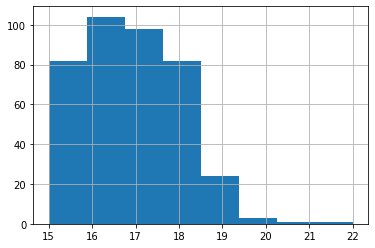

In [207]:
stud.age.hist(bins = len(stud.age.value_counts()))

Можно заметить, что основной возрастной диапазон 15-19 лет, возможно даже рассматривать часть данных как выбросы, однако, данный столбец представляет скорее категориальные данные.

### address
Строковый столбец, представляющий тип адреса ученика ('U' - городской, 'R' - за городом). В процессе устранения пропусков 17 нулевых значений было исправлено на моду - U.

In [208]:
display(pd.DataFrame(stud.address.value_counts()))

,address
U,312
R,83


Соотношение городских адресов и "за городом" близко к соотношению школ, хотя это мало имеет отношение к цели данного проекта.

### famsize
Строковый столбец, представляющий размер семьи: 'LE3' <= 3, 'GT3' > 3 - категориальные данные. 27 изначально пустых значений установлены в моду - GT3

In [209]:
display(pd.DataFrame(stud.famsize.value_counts()))

,famsize
GT3,288
LE3,107


### Pstatus
Строковый столбец, представляющий статус совместного жилья родителей: 'T' - живут вместе, 'A' - раздельно. Обнаружено более 11% пропущенных значений. 

In [210]:
display(pd.DataFrame(stud.Pstatus.value_counts()))

,Pstatus
T,359
A,36


### Medu
Числовой столбец, содержащий категориальные данные об образовании матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Изначально, содержал 3 пропущенных значения, которые были установленны в моду - 4.0

In [211]:
display(pd.DataFrame(stud.Medu.value_counts()))

,Medu
4.0,134
2.0,102
3.0,97
1.0,59
0.0,3


### Fedu 
Числовой столбец, содержащий категориальные данные образовании отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее). Изначально содержал 24 пропущенных значения, установленных в процессе обработки в моду - 2.0:

In [212]:
display(pd.DataFrame(stud.Fedu.value_counts()))

,Fedu
2.0,130
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


Похоже, данные содержат одно некорректное значение (40). Возможно, это результат ошибки ручного ввода (предполагалось 4.0). Тем не менее, думаю, справедливо применить к этому значению принцип заполнения пропусков, и заменить некорректное значение на моду:

In [213]:
Fedu_mode = stud.Fedu.mode()[0]
stud['Fedu'] = stud.Fedu.apply(lambda x: Fedu_mode if x == 40.0 else x)

### Mjob
Строковый столбец с категориальными данными: работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). В исходном варианте содержал 19 пропусков, которые были заполнены значением моды - other

In [214]:
display(pd.DataFrame(stud.Mjob.value_counts()))

,Mjob
other,152
services,98
at_home,58
teacher,55
health,32


### Fjob
Строковый столбец с категориальными данными: работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое). В исходном варианте содержал 36 пропусков, которые были заполены значением моды - other

In [215]:
display(pd.DataFrame(stud.Fjob.value_counts()))

,Fjob
other,233
services,102
teacher,29
at_home,16
health,15


### reason
Очередной строковый столбец с категориальными данными: причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое). 17 пропусков в изначальном варианте заполнены значением моды - course:

In [216]:
display(pd.DataFrame(stud.reason.value_counts()))

,reason
course,154
home,104
reputation,103
other,34


### guardian
Строковый столбец, содержащий категориальные данные: опекун ('mother' - мать, 'father' - отец, 'other' - другое). 31 пропущенное значение установлено в моду - mother

In [217]:
display(pd.DataFrame(stud.guardian.value_counts()))

,guardian
mother,281
father,86
other,28


### traveltime
Числовой столбец, представляющий категориальные данные: время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.) 28 изначально пропущеных значений заполнены значением моды.

In [218]:
display(pd.DataFrame(stud.traveltime.value_counts()))

,traveltime
1.0,270
2.0,96
3.0,22
4.0,7


### studytime
Категориальные данные выраженные числовым типом: время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов). 7 пропущенных значений в изначальном варианте заполнены значением моды.

In [219]:
display(pd.DataFrame(stud.studytime.value_counts()))

,studytime
2.0,201
1.0,103
3.0,64
4.0,27


### failures 
Kоличество внеучебных неудач (n, если 1<=n<=3, иначе 0). 22 пропуска заполнены модой:

In [220]:
display(pd.DataFrame(stud.failures.value_counts()))

,failures
0.0,315
1.0,49
2.0,16
3.0,15


### schoolsup 
Категориальные данные: дополнительная образовательная поддержка (yes или no). 7 пропусков заполнены модой:

In [221]:
display(pd.DataFrame(stud.schoolsup.value_counts()))

,schoolsup
no,344
yes,51


### famsup 
Категориальные данные: семейная образовательная поддержка (yes или no). 39 (около 10%) пропущенных значений установленны в моду

In [222]:
display(pd.DataFrame(stud.famsup.value_counts()))

,famsup
yes,258
no,137


### paid 
Опять, категориальные данные: дополнительные платные занятия по математике (yes или no). 40 пропущенных значений заполнены значением моды

In [223]:
display(pd.DataFrame(stud.paid.value_counts()))

,paid
no,240
yes,155


### activities 
Категориальные данные: дополнительные внеучебные занятия (yes или no). 14 значений было установленно в моду

In [224]:
display(pd.DataFrame(stud.activities.value_counts()))

,activities
yes,209
no,186


### nursery 
Сведения о том, посещщал ли ученик детский сад - категориальные данные. 16 пропущенных значений заполнены модой в процессе предобработки.

In [225]:
display(pd.DataFrame(stud.nursery.value_counts()))

,nursery
yes,316
no,79


### higher 
Категориальные значения:  хочет получить высшее образование (yes или no). 20 пропущенных значений (ок 5%) заполнены значением моды

In [226]:
display(pd.DataFrame(stud.higher.value_counts()))

,higher
yes,376
no,19


### internet 
Категориальные значения: наличие интернета дома (yes или no). 34 пропущенных значения заполнены модой


In [227]:
display(pd.DataFrame(stud.internet.value_counts()))

,internet
yes,339
no,56


### romantic 
Категориальные значения: в романтических отношениях (yes или no). Выявлено 31 пропущенное значение, заполнены значением моды

In [228]:
display(pd.DataFrame(stud.romantic.value_counts()))

,romantic
no,271
yes,124


### famrel 
Категориальные значения, представленные числовыми данными: семейные отношения (от 1 - очень плохо до 5 - очень хорошо). 27 пропущеннных значений заполнены модой

In [229]:
display(pd.DataFrame(stud.famrel.value_counts()))

,famrel
4.0,209
5.0,99
3.0,62
2.0,17
1.0,7
-1.0,1


Похоже, данные содержат одно некорректное значение (-1). Думаю, справедливо применить к этому значению принцип заполнения пропусков, и заменить некорректное значение на моду:

In [230]:
famrel_mode = stud.famrel.mode()[0]
stud['famrel'] = stud.famrel.apply(lambda x: famrel_mode if x == -1.0 else x)


### freetime
Категориальные данные:  свободное время после школы (от 1 - очень мало до 5 - очень мого), изначально 11 пропущенных значений, использовалось значение моды для заполнения.

In [231]:
display(pd.DataFrame(stud.freetime.value_counts()))

,freetime
3.0,164
4.0,112
2.0,63
5.0,38
1.0,18


### goout
Категориальные данные: свободное время после школы (от 1 - очень мало до 5 - очень мого). Пропущенные значения (8) заполненые значением моды

In [232]:
display(pd.DataFrame(stud.goout.value_counts()))

,goout
3.0,135
2.0,101
4.0,84
5.0,52
1.0,23


### health
Категориальные данные:текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо). Изначально 15 пропущенных значений, установлены в моду

In [233]:
display(pd.DataFrame(stud.health.value_counts()))

,health
5.0,153
3.0,89
4.0,63
1.0,47
2.0,43


### absences
Количественные данные: количество пропущенных занятий. Проверим, есть ли пропущенные значения.

In [234]:
print('Количество пропущенных значений:', 
      stud.absences.isna().any().sum())

Количество пропущенных значений: 1


Разберемся с пропущенными значениями (установим в значение медианы) и посмотрим на распределение значений

<AxesSubplot:>

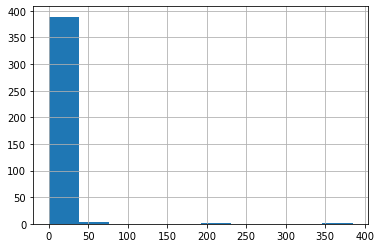

In [235]:
stud.absences.fillna(stud.absences.median(), inplace=True)
stud.absences.hist()

<AxesSubplot:>

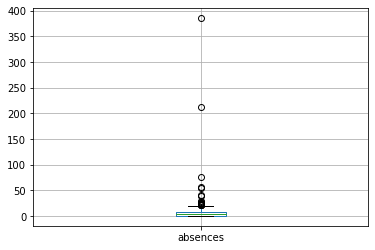

In [236]:
stud.boxplot(column=['absences'])

Присутствуют явные выбросы, от которых придется избавиться (выберем метод удаления строк). Сначала, найдем границы выбросов 

In [237]:
outrange = display_outliers_range(stud.absences)

Outliers bounds for 'absences': -12.0 - 20.0


Посмотрим на распределение значений после устранения выбросов

<AxesSubplot:>

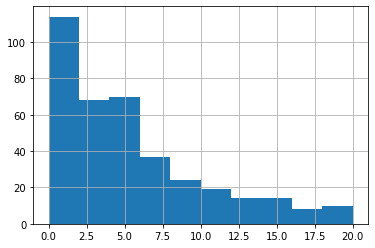

In [238]:
stud = stud[stud.absences.between(outrange[0], outrange[1])]
stud.absences.hist()

### score
Целевые данные числового типа - баллы по госэкзамену по математике.
Сначала поверим "наличие отсутствия" пропущенных значений

In [239]:
print('Количество пропущенных значений:', 
      stud.score.isna().any().sum())

Количество пропущенных значений: 1


Лишь одно значение пропущено. Для целевых данных, пожалуй, лучше просто отказаться от данной строки.

,score
50.0,54
55.0,42
0.0,37
75.0,33
60.0,31
65.0,30
40.0,28
70.0,27
45.0,23
80.0,16


<AxesSubplot:>

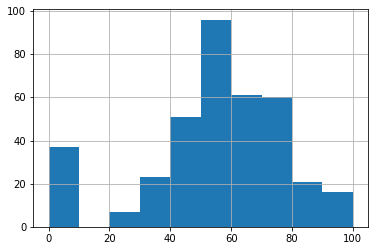

In [240]:
stud = stud[stud.score.notna()]
display(pd.DataFrame(stud.score.value_counts()))
stud.score.hist()

На гистограмме заметна некоторая аномалия в распределении данных. Проверим границы выбросов:

In [241]:
outrange = display_outliers_range(stud.score)

Outliers bounds for 'score': -5.0 - 115.0


Все значения находятся в пределах границ выбросов. Тем не менее, логика подсказывает, что:
* распределение оценок практически маловероятно может содержать разрывы (т.е. в контексте пятибальной сиситемы, например, отстутствие троечников при большом количество хорошистов и двоечников неправдоподобно), особенно с такой пропорцией минимальных значений, как в нашем примере
* при явке на любой экзамен просто невозможно не ответить хотя бы на один вопрос, даже путем угадывания

Вышеизложенное, наводит на мысль, что возможно нулевые значения обозначают отсутствие на экзамене по какой-либо причине. Нам кажется правильным избавиться от данных значений.

<AxesSubplot:>

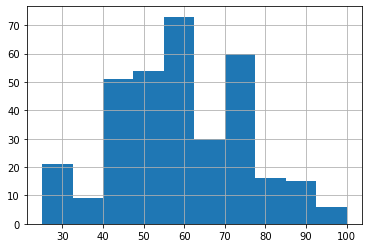

In [242]:
stud = stud[stud.score > 0]
stud.score.hist()

Такой вариант нам кажется более правдоподобным и логически принимаемым.

## Устранение номинативных столбцов, не влияющих на score

Выведем коробочные диаграмы для всех номинативных столбцов для визуального анализ и попытаемся найти столбцы, влияющие на score:

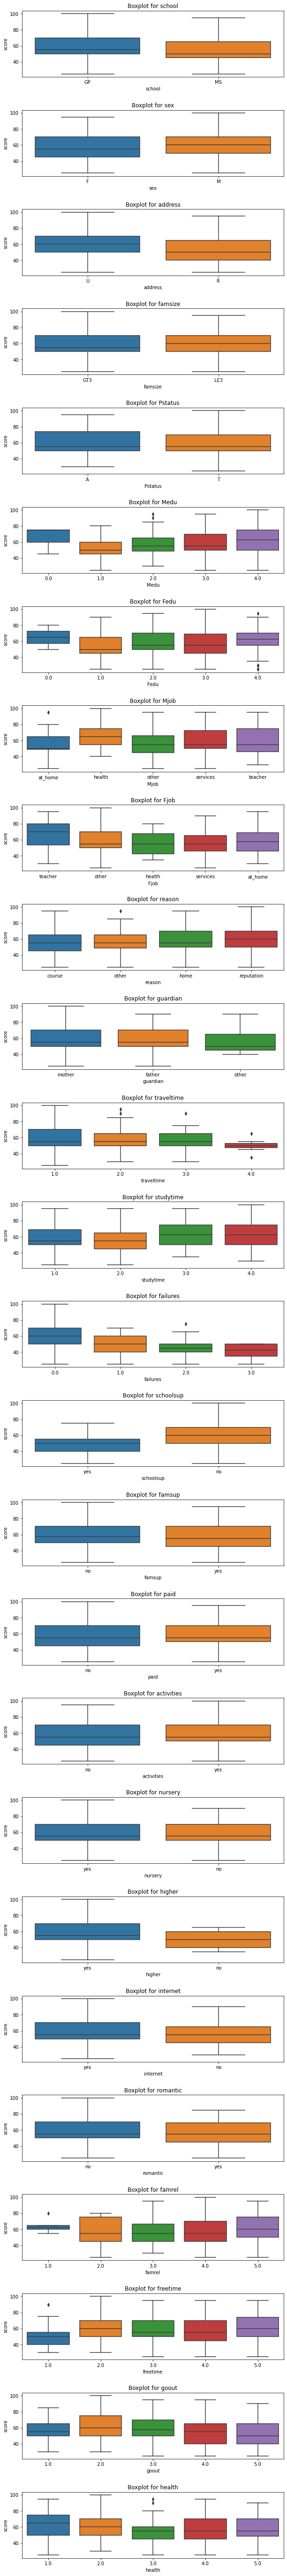

In [243]:
cols = ['school', 'sex', 'address', 'famsize', 'Pstatus',
        'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian',
        'traveltime', 'studytime', 'failures', 'schoolsup',
        'famsup', 'paid', 'activities', 'nursery', 'higher',
        'internet', 'romantic', 'famrel', 'freetime', 'goout',
        'health']

fig, axs = plt.subplots(nrows=len(cols), figsize=(10, 100))

for i, col in enumerate(cols):
    sns.boxplot(x=col, y='score', data=stud, ax=axs[i])
    axs[i].set_title('Boxplot for ' + col)

plt.subplots_adjust(hspace=0.5)

In [244]:
def stat_diff(df, cols):
    stat_diff = []
    for col in cols:
        vci = df[col].value_counts().index
        combs = list(combinations(vci, 2))
        for comb in combs:
            v1 = df[df[col] == comb[0]]['score']
            v2 = df[df[col] == comb[1]]['score']
            if ttest_ind(v1, v2).pvalue <= (0.05 / len(combs)):
                print(f'Found statistically significant diff for \'{col}\'')
                stat_diff.append(col)
                break
    return stat_diff

cols = stat_diff(stud, cols)
print(cols)

Found statistically significant diff for 'sex'
Found statistically significant diff for 'address'
Found statistically significant diff for 'Medu'
Found statistically significant diff for 'Fedu'
Found statistically significant diff for 'Mjob'
Found statistically significant diff for 'studytime'
Found statistically significant diff for 'failures'
Found statistically significant diff for 'schoolsup'
Found statistically significant diff for 'health'
['sex', 'address', 'Medu', 'Fedu', 'Mjob', 'studytime', 'failures', 'schoolsup', 'health']


Удалим категориальные дынне не имеющие значимого влияния на score. И представим диаграмму взаимоотношений оставшихся данных.

In [247]:
cols.append('age')
cols.append('absences')
cols.append('score')
stud = stud[cols]
display(stud.head(10))
stud.info()

,sex,address,Medu,Fedu,Mjob,studytime,failures,schoolsup,health,age,absences,score,age,absences,score
0,F,U,4.0,4.0,at_home,2.0,0.0,yes,3.0,18,6.0,30.0,18,6.0,30.0
1,F,U,1.0,1.0,at_home,2.0,0.0,no,3.0,17,4.0,30.0,17,4.0,30.0
2,F,U,1.0,1.0,at_home,2.0,3.0,yes,3.0,15,10.0,50.0,15,10.0,50.0
3,F,U,4.0,2.0,health,3.0,0.0,no,5.0,15,2.0,75.0,15,2.0,75.0
4,F,U,3.0,3.0,other,2.0,0.0,no,5.0,16,4.0,50.0,16,4.0,50.0
5,M,U,4.0,3.0,services,2.0,0.0,no,5.0,16,10.0,75.0,16,10.0,75.0
6,M,U,2.0,2.0,other,2.0,0.0,no,3.0,16,0.0,55.0,16,0.0,55.0
7,F,U,4.0,4.0,other,2.0,0.0,yes,1.0,17,6.0,30.0,17,6.0,30.0
8,M,U,3.0,2.0,services,2.0,0.0,no,1.0,15,0.0,95.0,15,0.0,95.0
9,M,U,3.0,4.0,other,2.0,0.0,no,5.0,15,0.0,75.0,15,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 335 entries, 0 to 394
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sex        335 non-null    object 
 1   address    335 non-null    object 
 2   Medu       335 non-null    float64
 3   Fedu       335 non-null    float64
 4   Mjob       335 non-null    object 
 5   studytime  335 non-null    float64
 6   failures   335 non-null    float64
 7   schoolsup  335 non-null    object 
 8   health     335 non-null    float64
 9   age        335 non-null    int64  
 10  absences   335 non-null    float64
 11  score      335 non-null    float64
 12  age        335 non-null    int64  
 13  absences   335 non-null    float64
 14  score      335 non-null    float64
dtypes: float64(9), int64(2), object(4)
memory usage: 51.9+ KB


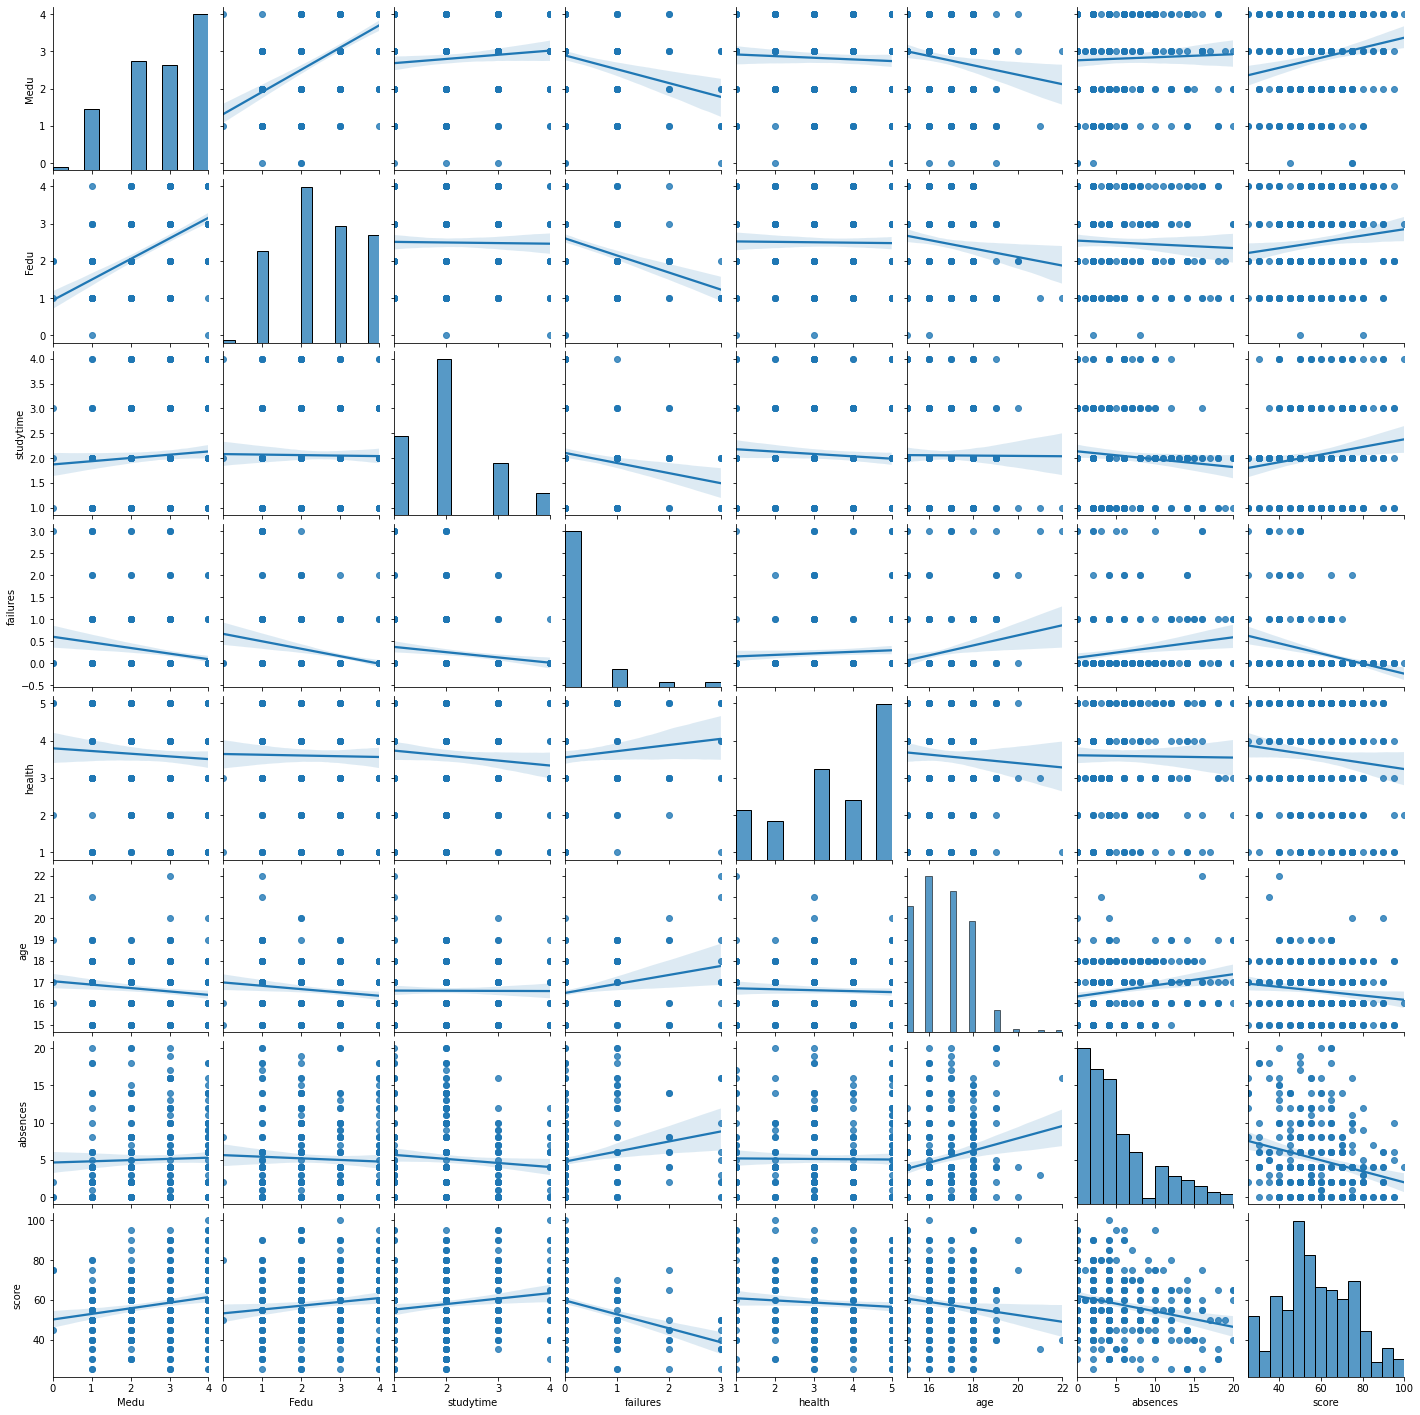

In [246]:
sns.pairplot(stud, kind = 'reg')

## Итоги
Проведен предварительный анализ данных содержащий набор сведений о о жизни учащихся в контексте выявления связи этих данных на успеваемость по математике.

Изначально данные содержали небольшое количество пропусков в номинативных переменных, что было устранено с помощью заполнения пропусков значением моды.

Устранена переменная имеющая сильную корреляцию с другой переменной набора данных.

Выявлена анамалия в данных о баллах по экзамену - сделано логическое предположение о отсутствии (пропуске) учащихся на экзамене, соответственно, такие значения были отброшены.

Проанализированы и устранены переменные, не имеющие значительного влияния на баллы за экзамен.

В целом, корреляция между итоговыми данными не сильно выражена.